# Asgmt: Support Vector Regression using Solar_Power_Generation.csv


## Importing the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [5]:
dataset = pd.read_csv('Solar_Power_Generation.csv')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values      

In [6]:
print(X)

[[   2.17       31.       1035.       ...   58.753108   83.237322
   128.33543 ]
 [   2.31       27.       1035.1      ...   45.408585   75.143041
   139.6553  ]
 [   3.65       33.       1035.4      ...   32.848282   68.820648
   152.53769 ]
 ...
 [   7.27       90.       1026.3      ...   25.249506   65.827032
   197.33868 ]
 [   8.25       81.       1025.5      ...   36.361161   70.496313
   211.30027 ]
 [   8.         80.       1025.3      ...   48.452849   76.919574
   223.04931 ]]


In [7]:
print(y)

[ 454.10095  1411.9994   2214.8493   ...  158.36778   126.95306
   20.055031]


In [8]:
y = y.reshape(len(y),1) # type: ignore

In [9]:
print(y)

[[ 454.10095 ]
 [1411.9994  ]
 [2214.8493  ]
 ...
 [ 158.36778 ]
 [ 126.95306 ]
 [  20.055031]]


## Handle Nan Value


In [10]:
missing_values = dataset.isnull().sum() # count of missing values in each column
print(missing_values)

temperature_2_m_above_gnd            1
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    1
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        1
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   1
dtype: int64


In [11]:
# fill missing values with the mean value of the column (Total Bedrooms)

dataset = dataset.fillna(dataset.median())

missing_values = dataset.isnull().sum() # count of missing values in each column
print(missing_values)

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64


In [12]:
# fill missing values with the median value 

X = pd.DataFrame(X).fillna(pd.DataFrame(X).median()).values
y = pd.DataFrame(y).fillna(pd.DataFrame(y).median()).values

## Feature Scaling 

In [13]:
from sklearn.preprocessing import StandardScaler

# Standard Scaler = x - mean(x) / standard deviation(x)
# Range of standard scaler is -3 to 3

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

## Training the SVR model on the whole dataset

In [14]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf') # Radial Basis Function Kernel
regressor.fit(X, y) # Fit the SVR model to the dataset

c:\IIUM\AI Note IIUM\venv\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [15]:
y_pred = regressor.predict(X) # Predict the results

In [16]:
y_pred_original_scale = sc_y.inverse_transform(y_pred.reshape(-1, 1)) # Convert the scaled values back to the original scale
y_original_scale = sc_y.inverse_transform(y)                          # Convert the scaled values back to the original scale

In [17]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_original_scale, y_pred_original_scale)
mae = mean_absolute_error(y_original_scale, y_pred_original_scale)
rmse = np.sqrt(mean_squared_error(y_original_scale, y_pred_original_scale))

print(f'R-squared: {r2:.4f}')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

R-squared: 0.8271
MAE: 239.06
RMSE: 389.96


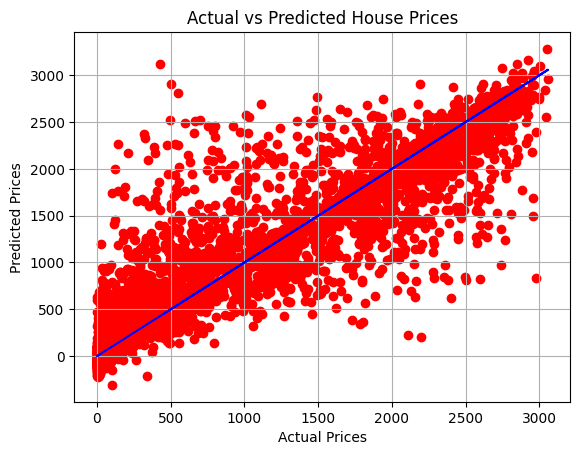

In [18]:
# Visualizing the Support Vector Regression results

plt.scatter(y_original_scale, y_pred_original_scale, color='Red')
plt.plot(y_original_scale, y_original_scale, color='Blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()